# CODE CHUNK - DISCRETE CHEBYSHEV APPROXIMATION

In [1]:
# Import all required libraries

import numpy as np
from scipy.special import chebyt
from scipy.integrate import quad
import matplotlib.pyplot as plt
import math

Coefficients:
  0
  1.28146
  1.66533e-16
 -0.449988
 -1.11022e-16
  0.300672
  6.93889e-17
 -0.254898


Approximation:
    x      func(x)       approx      diff
-1.000 -1.0000000000 -0.8772442662 1.23e-01
-0.998 -1.0000000000 -0.8924434591 1.08e-01
-0.996 -1.0000000000 -0.9070518269 9.29e-02
-0.994 -1.0000000000 -0.9210816292 7.89e-02
-0.992 -1.0000000000 -0.9345449722 6.55e-02
-0.990 -1.0000000000 -0.9474538095 5.25e-02
-0.988 -1.0000000000 -0.9598199440 4.02e-02
-0.986 -1.0000000000 -0.9716550283 2.83e-02
-0.984 -1.0000000000 -0.9829705667 1.70e-02
-0.982 -1.0000000000 -0.9937779154 6.22e-03
-0.980 -1.0000000000 -1.0040882845 -4.09e-03
-0.978 -1.0000000000 -1.0139127387 -1.39e-02
-0.976 -1.0000000000 -1.0232621985 -2.33e-02
-0.974 -1.0000000000 -1.0321474414 -3.21e-02
-0.972 -1.0000000000 -1.0405791031 -4.06e-02
-0.970 -1.0000000000 -1.0485676783 -4.86e-02
-0.968 -1.0000000000 -1.0561235225 -5.61e-02
-0.966 -1.0000000000 -1.0632568522 -6.33e-02
-0.964 -1.0000000000 -1.0699777468 -7.

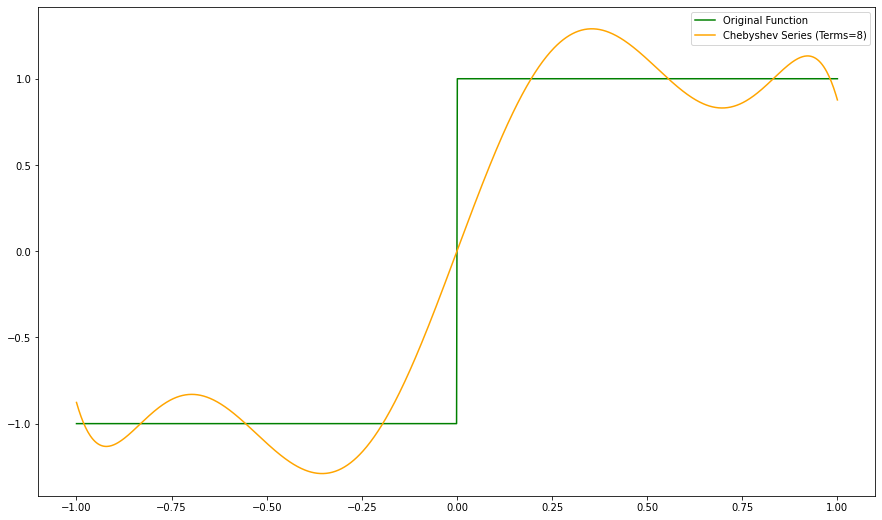

In [72]:
def test_func(x):
    return np.sign(x)

def mapper(x, min_x, max_x, min_to, max_to):
    return (x - min_x) / (max_x - min_x) * (max_to - min_to) + min_to

def cheb_coef(func, n, min_, max_):
    coef = [0.0] * n
    for i in range(n):
        f = func(mapper(math.cos(math.pi * (i + 0.5) / n), -1, 1, min_, max_)) * 2 / n
        for j in range(n):
            coef[j] += f * math.cos(math.pi * j * (i + 0.5) / n)
    return coef

def cheb_approx(x, n, min_, max_, coef):
    a = 1
    b = mapper(x, min_, max_, -1, 1)
    c = float('nan')
    res = coef[0] / 2 + coef[1] * b

    x = 2 * b
    i = 2
    while i < n:
        c = x * b - a
        res = res + coef[i] * c
        (a, b) = (b, c)
        i += 1

    return res

def main():
    N = 8
    min_ = -1
    max_ = 1
    c = cheb_coef(test_func, N, min_, max_)

    print("Coefficients:")
    for i in range(N):
        print(" % lg" % c[i])
        
    app = [ ]
    erx = [ ]
    er = quad(lambda x: pow((1 - (x * x)), -0.5) * pow((abs(test_func(x) - cheb_approx(x, N, min_, max_, c))), 2), -1, 1)[0]
    print("\n\nApproximation:\n    x      func(x)       approx      diff")
    for x in np.linspace(-1, 1, 1000):
        #x = mapper(i, -1, 1, min_, max_)
        f = test_func(x)
        approx = cheb_approx(x, N, min_, max_, c)
        app.append(approx)
        erx.append(abs(approx - f))
        print("%1.3f %10.10f %10.10f %4.2e" % (x, f, approx, approx - f))
    
    print("\n")
    print("The required L_inf error is: %4.4e" % max(erx))
    print("The required L_2 error is: %4.4e" % er)
    
    x_values = np.linspace(-1, 1, 1000)
    plt.figure(figsize=(15,9))
    plt.plot(x_values, test_func(x_values), 'green', label='Original Function' )       
    plt.plot(x_values, app, 'orange', label=f'Chebyshev Series (Terms={N})')                  
    #plt.gca().set_ylim([0, 4])
    plt.legend()
    plt.show()
    return None

main()

In [42]:
def order():
    e_n1 = 6.3283e-15
    e_n2 = 1.2990e-14
    rat = e_n1 / e_n2
    print("The order of convergence is: %4.3e" % (math.log10(rat) / math.log10(2)))

order()

The order of convergence is: -1.038e+00
